# 주의사항
제출 사이트: https://www.kaggle.com/c/titanic
<br>
<br>
Kaggle 사이트 제출 횟수에 제한이 있으므로 아무 방법이나 선택하여 적용하지 말고, 강의 시간 때 들었던 내용을 토대로 어떤 알고리즘이 좋을지 생각하여 적용시키기 바랍니다. 실제 점수도 중요하지만 해당 알고리즘을 적용해본 근거가 충분하면 높은 점수를 드릴 예정입니다.

In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

직접 preprocessing 과정을 결정하여 아래에 코드 작성

In [52]:
# Preprocessing
preprocessing_train_data = pd.read_csv('data/train.csv');
preprocessing_test_data = pd.read_csv('data/test.csv');

#직접 preprocessing 결정하여 코드 완성
############################################################
아래에 넣었습니다.


############################################################

In [53]:
#데이터의 성질 알아내기 
preprocessing_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [54]:
preprocessing_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


위 preprocessing 결과를 바탕으로 제시한 5가지 알고리즘 적용

In [55]:
#데이터 실제 검사하기 
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
preprocessing_train_data.describe(percentiles=[0.25, 0.75])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
# 데이터 읽어오기
preprocessing_train_data = pd.read_csv('data/train.csv')
preprocessing_test_data = pd.read_csv('data/test.csv')

In [65]:
# "Sex", "Embarked" vectorization
preprocessing_train_data.replace(['female', 'male'], [0, 1], inplace=True)
preprocessing_train_data.replace(['Q', 'C', 'S'], [0, 1, 2], inplace=True)

preprocessing_test_data.replace(['female', 'male'], [0, 1], inplace=True)
preprocessing_test_data.replace(['Q', 'C', 'S'], [0, 1, 2], inplace=True)


In [66]:
# 비워진 데이터 '0'으로 채우기
preprocessing_train_data.replace([None], [0], inplace=True)
preprocessing_test_data.replace([None], [0], inplace=True)

In [67]:
# "SibSp"와 "Parch" 정보를 합쳐 "FamilySize" 생성
preprocessing_train_data['FamilySize'] = preprocessing_train_data['SibSp'] + preprocessing_train_data['Parch']  
preprocessing_test_data['FamilySize'] = preprocessing_test_data['SibSp'] + preprocessing_test_data['Parch'] 

# "SibSp"와 "Parch" 제거
preprocessing_train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
preprocessing_test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [68]:
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,2.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,1.0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,2.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,2.0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,2.0,0


In [69]:

# "Family size" 4를 기준으로 하여 0과 1로 구분
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] > 4, 'FamilySize'] = 1

preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] > 4, 'FamilySize'] = 1

In [70]:

# "FamilySize"와 "Survived" 통계
preprocessing_train_data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
0,0.396919
1,0.148936


In [71]:
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,2.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,1.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,2.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,2.0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,2.0,0


In [72]:
# "Embarked" 빈 정보 S로 채우기
preprocessing_train_data['Embarked'].replace([None], ['S'], inplace=True)
preprocessing_test_data['Embarked'].replace([None], ['S'], inplace=True)



In [73]:
preprocessing_train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,211536,13.00,0,2.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,112053,30.00,B42,2.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.0,W./C. 6607,23.45,0,2.0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,111369,30.00,C148,1.0,0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,370376,7.75,0,0.0,0


In [74]:
# "Name" 중 일부 추출하여 "Title" 생성
preprocessing_train_data['Title'] = preprocessing_train_data.Name.str.extract('([A-Za-z]+)\.', expand=False)
preprocessing_test_data['Title'] = preprocessing_test_data.Name.str.extract('([A-Za-z]+)\.', expand=False)

# "Name", "Ticket", "Cabin" 제거
preprocessing_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
preprocessing_test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# "Title" 정보 통계
pd.crosstab(preprocessing_train_data['Title'], preprocessing_train_data['Sex'])


# 비워진 부분을 평균 나이로 복원
preprocessing_train_data['Age'].replace([None], [30], inplace=True)  
preprocessing_test_data['Age'].replace([None], [30], inplace=True)


In [120]:
# 주요 "Title"을 제외한 나머지는 'Rare'로 분류
preprocessing_train_data['Title'].replace(['Lady', 'Countess', 'Capt','Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)  
preprocessing_test_data['Title'].replace(['Lady', 'Countess', 'Capt','Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True) 

# 'Ms', 'Mlle', 'Mme'를 'Miss'로 통일
preprocessing_train_data['Title'].replace(['Ms', 'Mlle', 'Mme'], ['Miss', 'Miss', 'Miss'], inplace=True)
preprocessing_test_data['Title'].replace(['Ms', 'Mlle', 'Mme'], ['Miss', 'Miss', 'Miss'], inplace=True)

# "Title" vectorization
preprocessing_train_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1, 2, 3, 4, 5], inplace=True)
preprocessing_test_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1, 2, 3, 4, 5], inplace=True)

# "Title"이 없는 데이터는 '0'으로 지정
preprocessing_train_data['Title'].replace([None], [0], inplace=True)
preprocessing_test_data['Title'].replace([None], [0], inplace=True)

# 추가 Preprocessing

In [112]:
#추가로 preproceccion 부분

# preprocessing_train_data_age
preprocessing_train_data_Age_period = round(preprocessing_train_data['Age'],-1)
preprocessing_train_data_Age_period = preprocessing_train_data_Age_period.astype(int)

# preprocessing_train_data_Fare
preprocessing_train_data_Fare_period = round(preprocessing_train_data['Fare'],-1)
preprocessing_train_data_Fare_period = preprocessing_train_data_Fare_period.astype(int)

#preprocessing_test_data_Age
preprocessing_test_data_Age_period = round(preprocessing_test_data['Age'],-1)
preprocessing_test_data_Age_period = preprocessing_test_data_Age_period.astype(int)

#preprocessing_test_data_Fare
preprocessing_test_data_Fare_period = round(preprocessing_test_data['Fare'],-1)
preprocessing_test_data_Fare_period = preprocessing_test_data_Fare_period.astype(int)

In [116]:
# "Age_period"와 "Fare_period" 추가
preprocessing_train_data['Age_period'] = preprocessing_train_data_Age_period
preprocessing_train_data['Fare_period'] = preprocessing_train_data_Fare_period

preprocessing_test_data['Age_period'] = preprocessing_test_data_Age_period
preprocessing_test_data['Fare_period'] = preprocessing_test_data_Fare_period

# "Age"와 "Fare" 제거
preprocessing_train_data.drop(['Age', 'Fare'], axis=1, inplace=True)
preprocessing_test_data.drop(['Age', 'Fare'], axis=1, inplace=True)


In [121]:
#결과 출력
preprocessing_train_data.head()
preprocessing_test_data.head()

,PassengerId,Pclass,Sex,Embarked,FamilySize,Title,Age_period,Fare_period
0,892,3,1,0,0,1,30,10
1,893,3,0,2,0,3,50,10
2,894,2,1,0,0,1,60,10
3,895,3,1,2,0,1,30,10
4,896,3,0,2,0,3,20,10


In [123]:
# training을 위한 데이터 생성
X_train = preprocessing_train_data.drop(['Survived', 'PassengerId'], axis=1)
Y_train = preprocessing_train_data["Survived"]
X_test = preprocessing_test_data.drop(['PassengerId'], axis=1)

Accuracy:  89.23
Area Under the Curve:  0.96


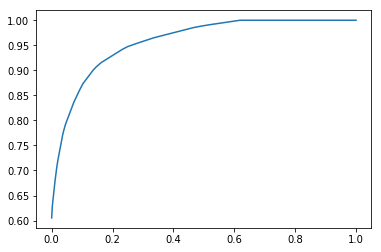

In [133]:
# 알고리즘 선택, 사용하고 싶은 알고리즘을 classifier로 지정하여 사용
#classifier = KNeighborsClassifier()
#classifier = LogisticRegression()
#classifier = SVC(probability=True)
classifier = DecisionTreeClassifier()
#classifier = RandomForestClassifier()
#classifier = GaussianNB()

# 위에서 설정한 classifier의 accuracy 및 AUC, ROC 곡선 확인
classifier.fit(X_train, Y_train)
accuracy = classifier.score(X_train, Y_train) * 100
Y_train_pred = classifier.predict_proba(X_train)[:, 1]

FPR, TPR, thresholds = roc_curve(Y_train, Y_train_pred)
AUC = roc_auc_score(Y_train, Y_train_pred)

plt.plot(FPR, TPR)
print("Accuracy: ", "{0:.2f}".format(accuracy))
print("Area Under the Curve: ", "{0:.2f}".format(AUC))

In [134]:
# test 데이터 예측 결과 출력 및 kaggle 제출파일 생성
predict = classifier.predict(X_test)
predict = np.round(predict)

# kaggle 제출 파일 생성
submission = pd.DataFrame({'PassengerId': preprocessing_test_data['PassengerId'], 'Survived': predict})
submission.to_csv('Final_submission.csv', index=False)



knn 함수 자료: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
<br>
logistic regression 함수 자료: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
<br>
SVC 함수 자료: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<br>
DecisionTree 함수 자료: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
<br>
RandomForest 함수 자료: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html